<a href="https://colab.research.google.com/github/NadiaDrir/Hello/blob/main/Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("data_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data["Age"].fillna(data['Age'].mean(),inplace=True)
data["Age"].value_counts


<bound method IndexOpsMixin.value_counts of 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64>

In [5]:
from sklearn import metrics
data["Embarked"].value_counts() 
data['Embarked'].fillna('S',inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Sex'].value_counts
data['Embarked']=encoder.fit_transform(data['Sex'])
data['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Embarked, Length: 891, dtype: int64>

In [7]:
data.replace({'Survived':{1: 'YES',0:"NO"}},inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=data[['Age','Pclass','Sex','Embarked']]
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20,random_state=10)
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train) #fitting our model
y_pred=model.predict(x_test) # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8603351955307262


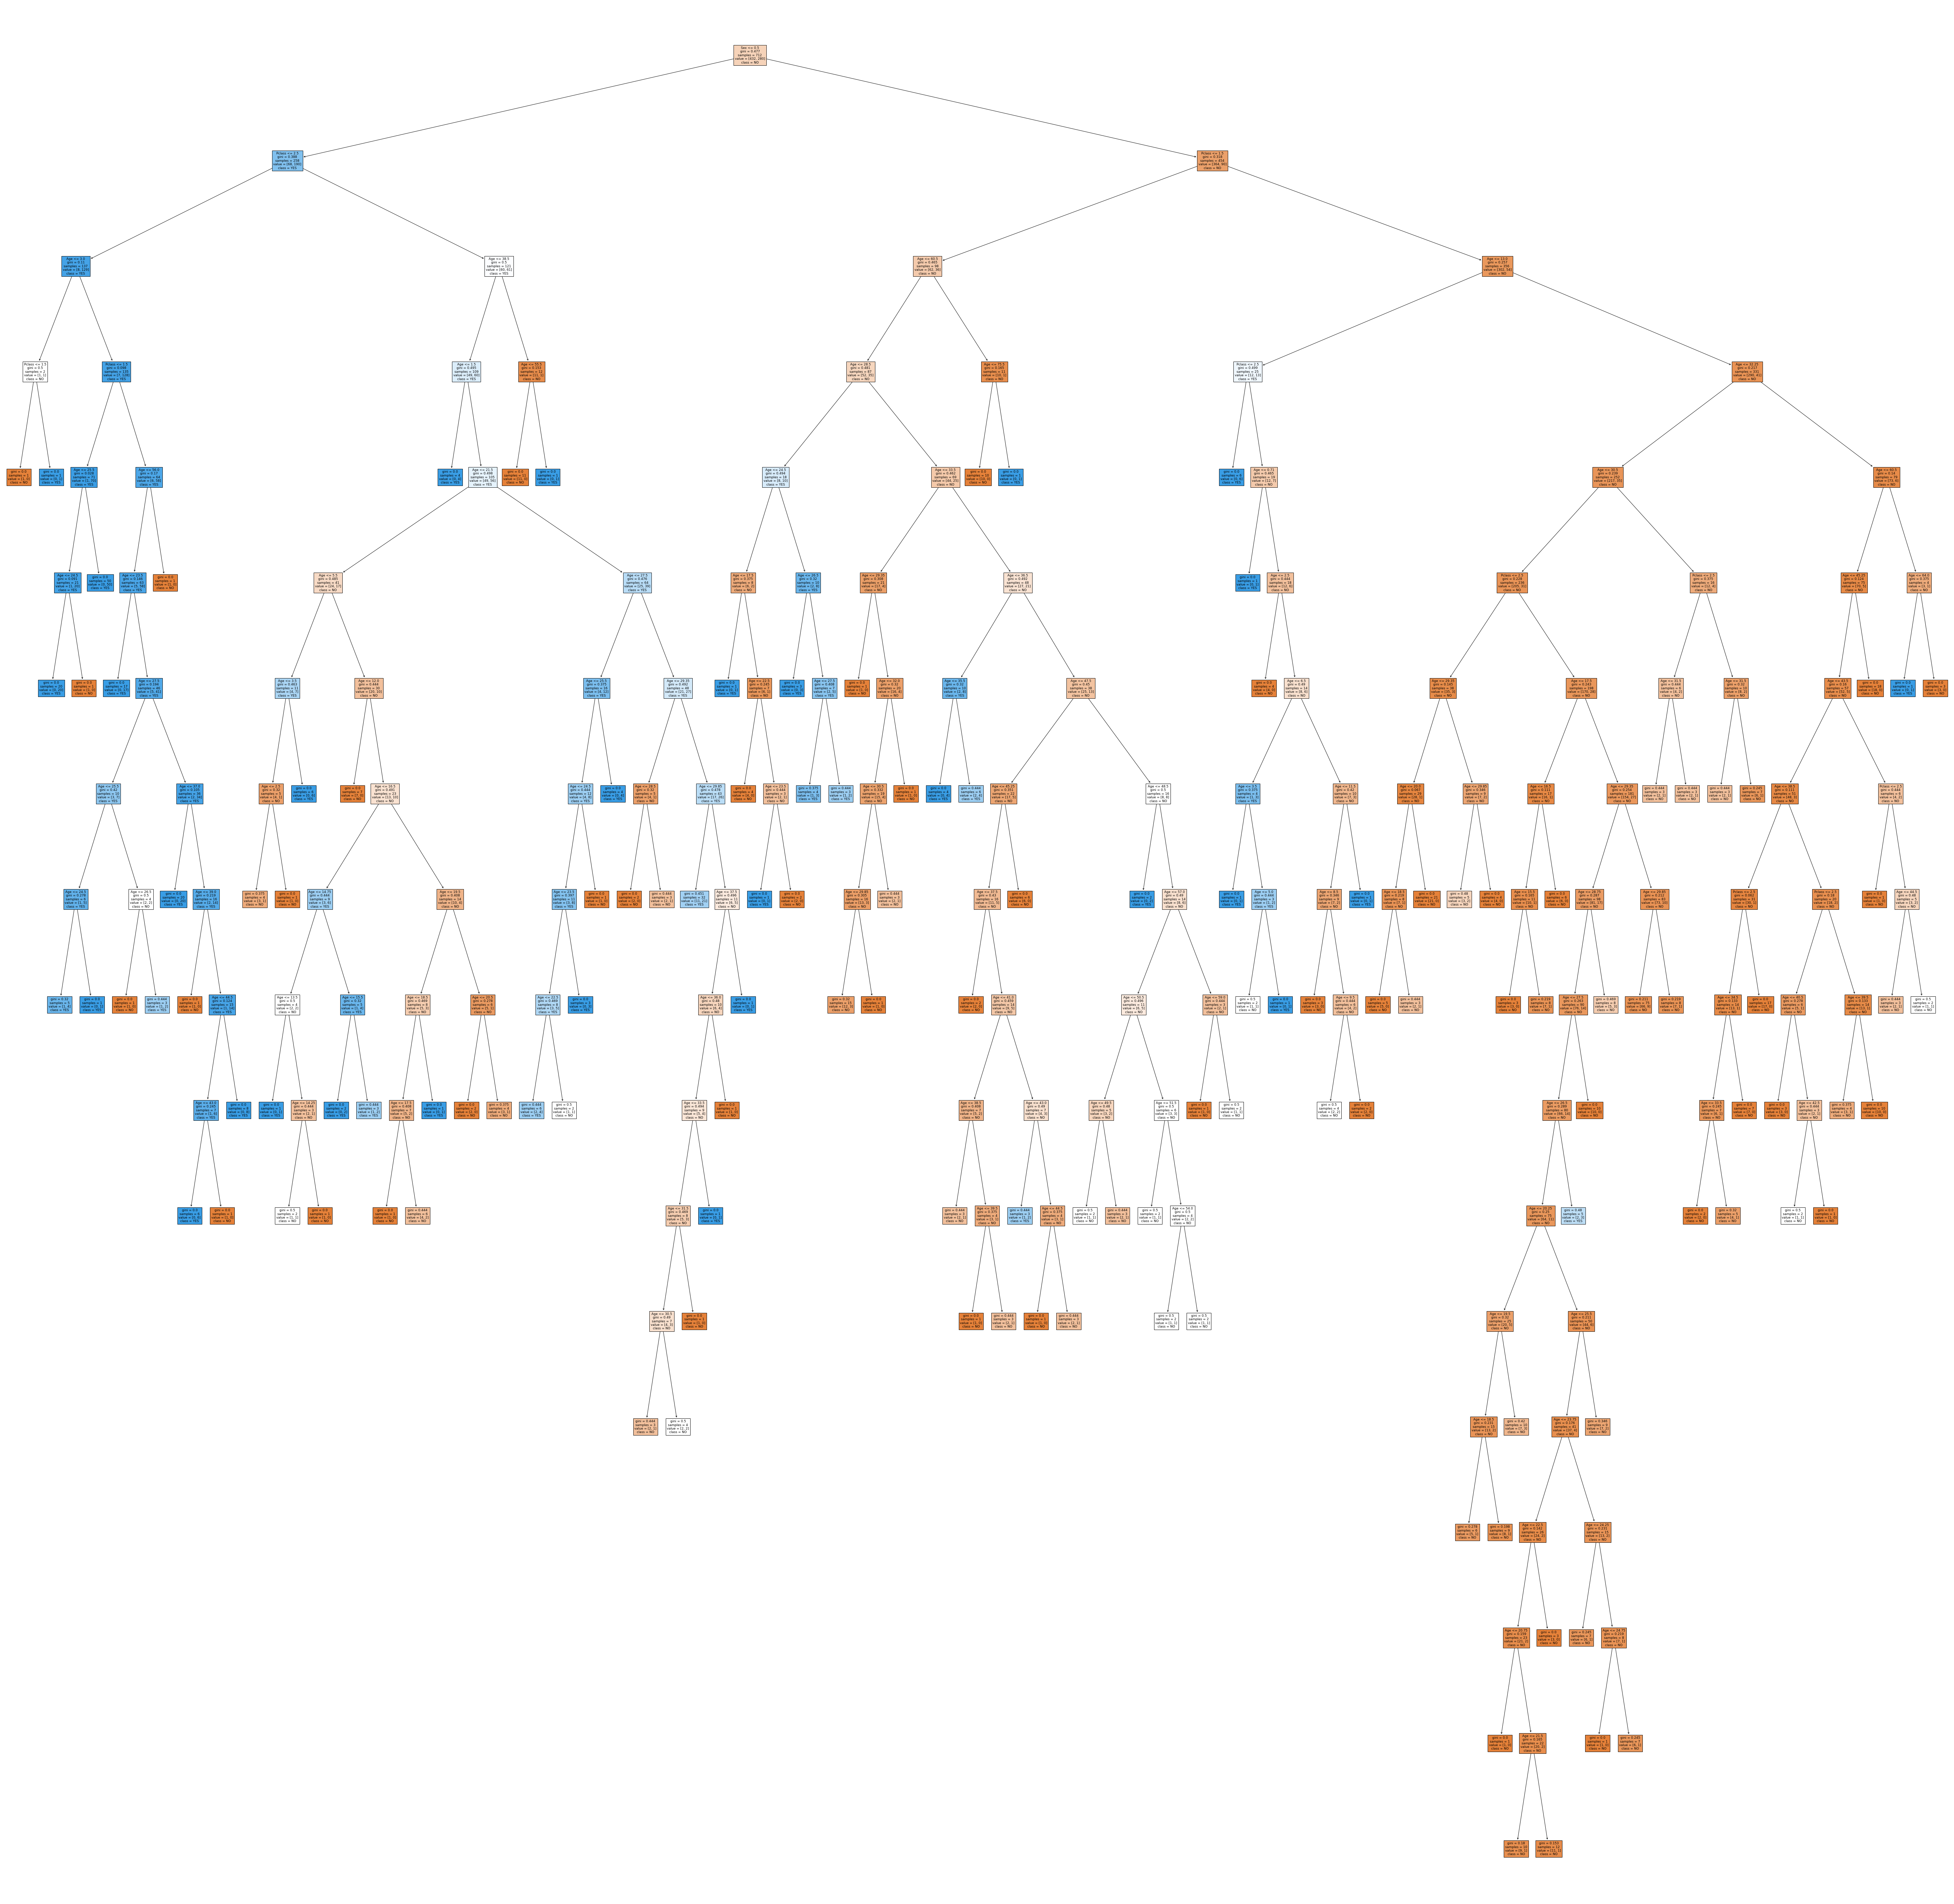

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, feature_names=x.columns.values.tolist(),class_names=data.Survived.unique(),filled=True)
fig.savefig("tree.png")

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
#a = datasets.load_data_titanic()
x=data[['Age','Pclass','Sex','Embarked']]
y= data["Survived"]
clf=RandomForestClassifier(n_estimators=7)
clf.fit(x_train, y_train) #T raining our model
y_pred=clf.predict(x_test) #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8603351955307262


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
#a = datasets.load_data_titanic()
x=data[['Age','Pclass','Sex','Embarked']]
y= data["Survived"]
clf=RandomForestClassifier(n_estimators=9)
scores=cross_val_score(clf, x, y, cv=12)
print('Accurancy on each fold/subser:',scores)
print('The average accurancyis',sum(scores)/8)

Accurancy on each fold/subser: [0.78666667 0.76       0.78666667 0.7972973  0.89189189 0.82432432
 0.75675676 0.82432432 0.82432432 0.77027027 0.7972973  0.7972973 ]
The average accurancyis 1.2021396396396395
